In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from growth.sweep.sweep import Sweep

In [3]:
ls ../simulations/

sweep_111818_no_history/           sweep_111918_growth_p1/
sweep_111818_with_history/         sweep_111918_growth_p5/
sweep_111918_fraction_recombining/


In [119]:
path = '../simulations/sweep_111918_growth_p1'
sweep = Sweep.load(path)

In [120]:
import matplotlib.pyplot as plt

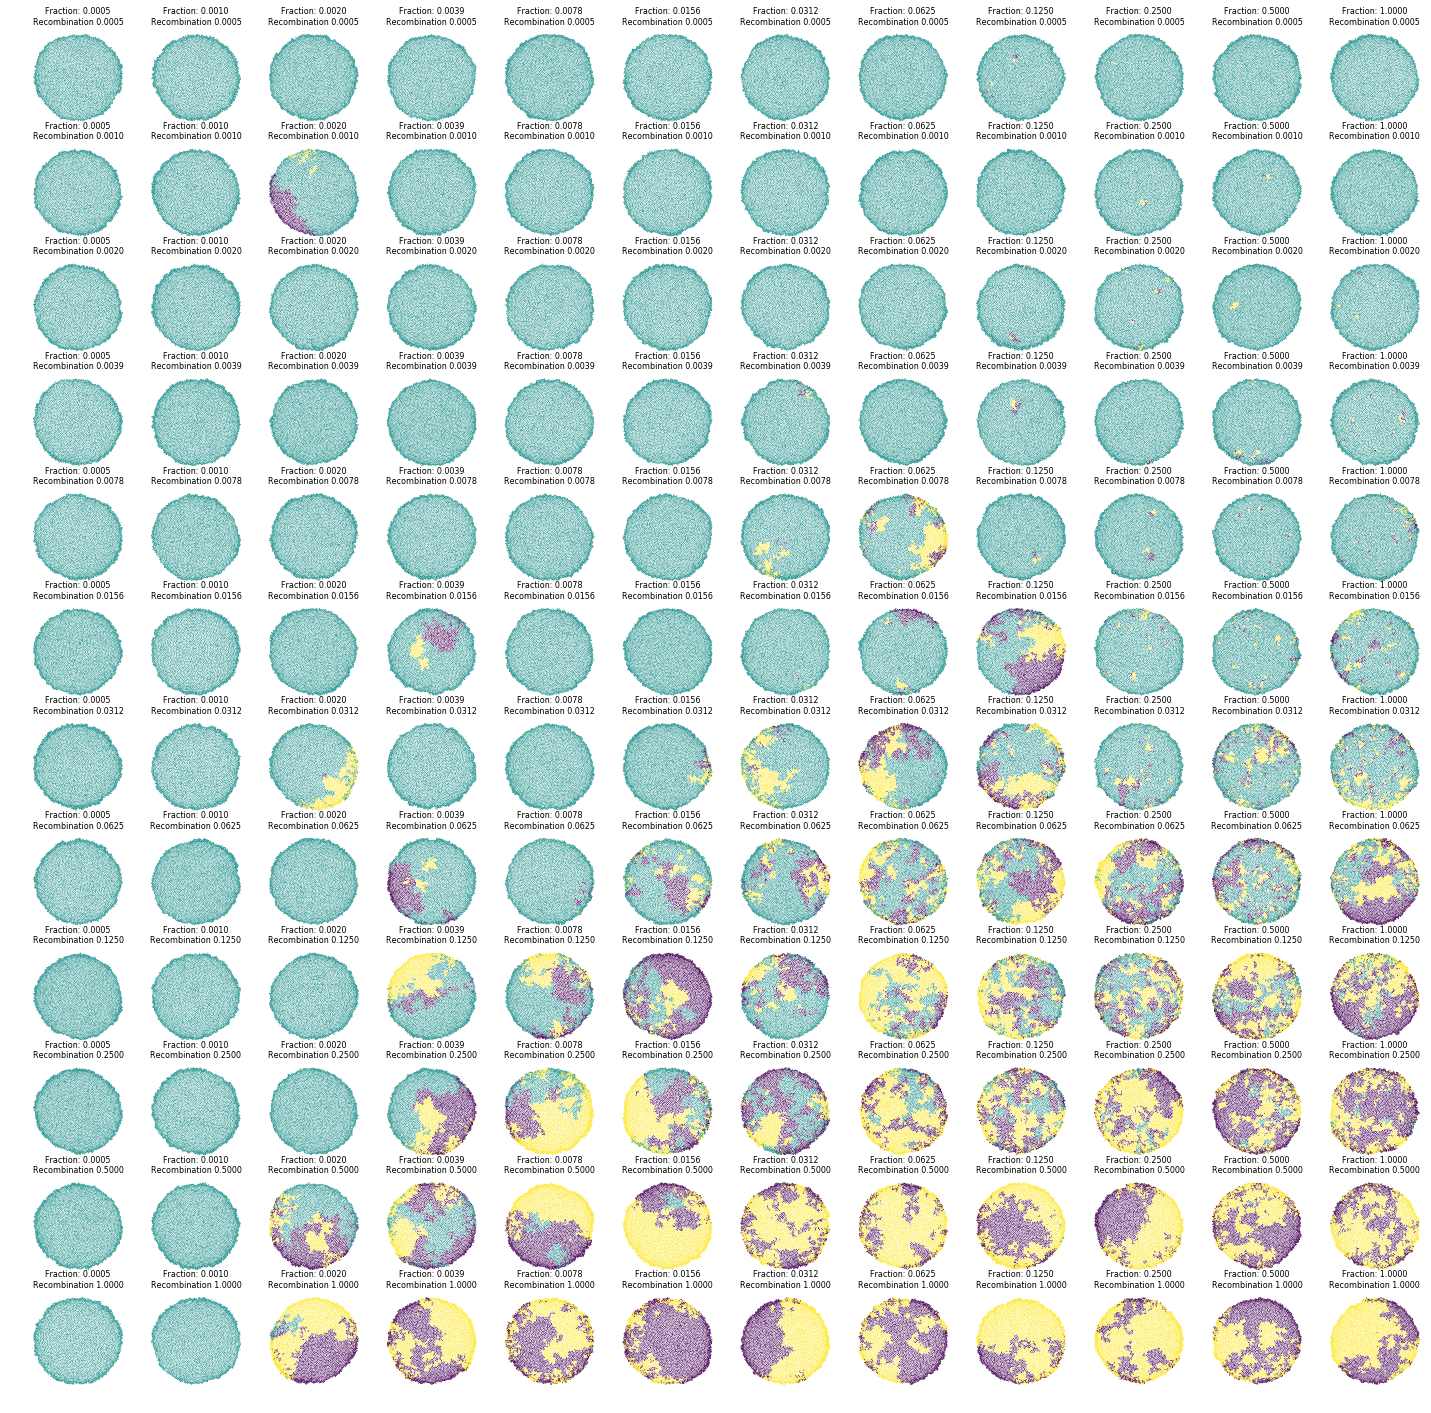

In [121]:
replicate_id = 0
resolution = 1

row_size = sweep.density * sweep.batch_size
nrows = int(sweep.N / row_size)

fig, axes = plt.subplots(nrows=int(nrows/resolution), ncols=int(nrows/resolution), figsize=(25, 25))

ax_id = 0
for i in range(int(nrows/resolution)):   
    for j in range(int(row_size/resolution)):
        
        # load simulation
        simulation_index = i*(row_size * resolution) + j*resolution + replicate_id
        sim = sweep[simulation_index]
        
        # plot culture
        ax = axes.flatten()[ax_id]
        sim.plot(ax=ax, s=1)
        fraction = sim.recombinant_population / sim.final_population
        ax.set_title('Fraction: {:0.4f}\nRecombination {:0.4f}'.format(fraction, sim.recombination), fontsize=8)
        ax.axis('off')
        
        # increment ax_id
        ax_id += 1

In [ ]:
"""
Want to test:
    1. Heterogeneity/Mixing
    2. Fluorescence spectral overlap

METRICS:
    1. mean size of a connected component
    2. number of connected components
    3. % heterogeneous


A: Plot heatmaps of each metric for growth vs recombination rate


"""

# Simulation video

In [75]:
%%capture
lineage_video = culture.animate(interval=200, colorby='lineage', cmap=plt.cm.rainbow, repeat_delay=5000)
genotype_video = culture.animate(interval=200, colorby='genotype', cmap=plt.cm.viridis, repeat_delay=5000)

In [76]:
# play video
HTML(genotype_video)

AttributeError: 'Fluorescence' object has no attribute 'support'

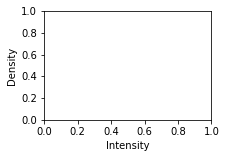

In [161]:
culture.fluorescence.show_pdf()

In [160]:
culture = culture.branch()

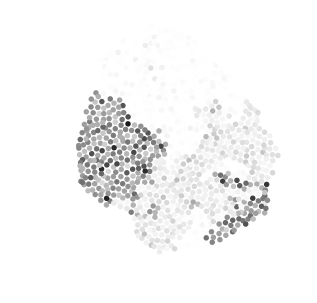

In [31]:
culture.freeze(-1).plot(colorby='phenotype', cmap=plt.cm.Greys)

In [26]:
phylogeny = culture.phylogeny

In [ ]:
# sweep fluorecence functions (can permute with growth)

In [ ]:
colony size

colony heterogeneity (recombination rate)

In [32]:
ls

development.ipynb


In [162]:
import scipy.stats as st

In [191]:
from growth.fluorescence import Fluorescence

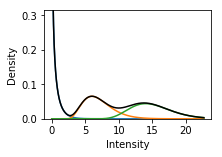

In [211]:
fluor = Fluorescence(shape=(0.5, 5, 10), loc=(0, 2, 5), density=100000)
fluor.show_pdf()

In [64]:
branch = culture.freeze(25)

In [67]:
from ete3 import Tree, TreeStyle

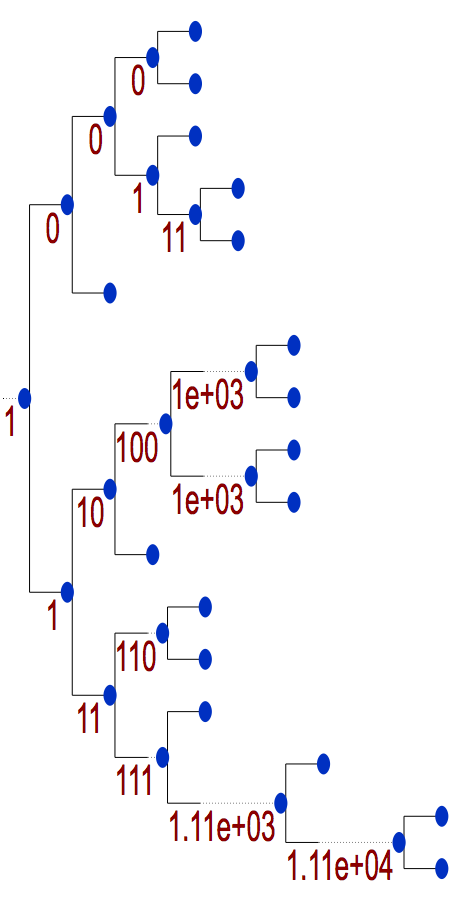

In [84]:
t = Tree(branch.phylogeny.newick)
#t.populate(10, random_branches=True)
ts = TreeStyle()
ts.show_leaf_name = False
ts.scale = 10
ts.show_scale = False
ts.min_leaf_separation = 10
ts.show_branch_support = True

#ts.scale =  10 # 120 pixels per branch length unit
t.render("%%inline", tree_style=ts, h=10, w=5, units='in')

In [141]:
lim = (-1.2, 1.2)

xr = np.linspace(*lim, num=1000)
xx, yy = np.meshgrid(*(xr,)*2)
zz = griddata(pop.xy, pop.genotypes, (xx, yy), method='nearest')
mask = griddata(pop.xy, pop.genotypes, (xx, yy), method='linear')
zz = np.ma.masked_array(zz, mask=np.isnan(mask))

(-1.2, 1.2, -1.2, 1.2)

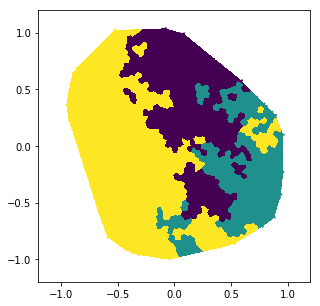

In [142]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.flipud(zz), extent=lim+lim)

pop.plot(ax=ax, s=5)
ax2.set_aspect(1)

#ax.contour(zz.data==2, )
ax.axis('on')

In [143]:
from sklearn.neighbors import KernelDensity

In [146]:
kde = KernelDensity().fit(pop.xy)

In [166]:
density = kde.score_samples(np.stack((xx,yy)).T.reshape(-1, 2))

(1000, 1000)

In [ ]:
def _evaluate_max_edge_lengths(self):
    """ Returns max edge length per triangle. """
    merge = lambda x: np.hstack((x, x.sum(axis=1).reshape(-1, 1)))
    dx = np.diff(self.x[self.triangles], axis=1)
    dy = np.diff(self.y[self.triangles], axis=1)
    return np.sqrt((merge(dx)**2) + (merge(dy)**2)).max(axis=1)

In [ ]:
plt.triplot(pop.triangulation, 'bo-', lw=1, markersize=3, alpha=0.1)

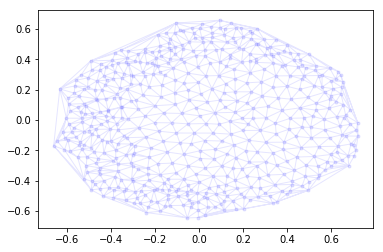

In [13]:
plt.triplot(pop.triangulation, 'bo-', lw=1, markersize=3, alpha=0.1)

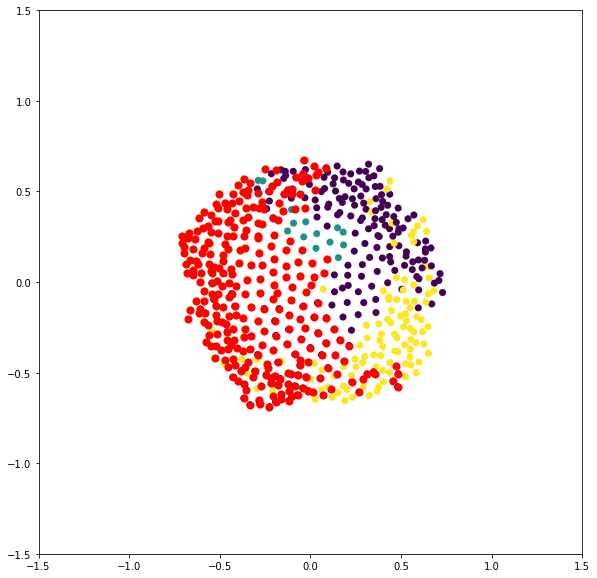

In [178]:
fig, ax = plt.subplots(figsize=(10, 10))
pop.plot(ax)

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)


parent = '0'
descendents = np.array([lineage.startswith(parent) for lineage in pop.lineages])
descendents_xy = pop.xy[descendents]

ax.scatter(*descendents_xy.T, c='r', s=50)

In [111]:
parent = '000'
for child in G.neighbors(parent):
    print(child)

0000
0001


In [112]:
successors = nx.nodes(nx.dfs_tree(G, your_node))

<bound method DiGraph.successors of <networkx.classes.digraph.DiGraph object at 0x112d897f0>>

In [117]:
nx.dfs_tree(G, parent)

In [125]:
parent = '00001'
successors = nx.dfs_successors(G, source=parent)


predecessors = nx.dfs_predecessors(G, parent).keys()

In [133]:
end = list(set(predecessors).difference(set(successors)))

In [134]:
a = '00132213'

In [139]:
a

True

In [ ]:
nx.kamada_kawai_layout

In [352]:
G = nx.DiGraph(dendrogram)

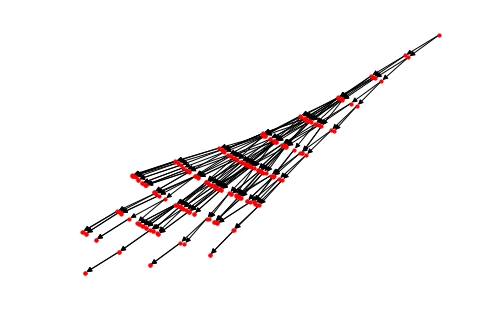

In [361]:
nx.draw_kamada_kawai(G, node_size=10, with_labels=False)